## Building Machine Learning Pipeline: Data Analysis Phase

We will focus on creating Machine Learning Pipelines considering all the lige cycle of a Data Science Project. This will be important for professtionals who have not worked with huge datasets.

## Project name: House Prices- Advanced Regression Techniques

The main aim of this project is to predict house price based on various features which we will dicuss as we go on.

### Dataset to download

[House Prices Dataset]()

## All the Lifecycle in A Data Science Projects

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deplyment

In [1]:
## Data Anaysis
## Main Aim is to understand more about the data

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns', None)

/Users/oliver/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dataset = pd.read_csv('/Users/oliver/Desktop/Road to DS in 2024/DS2024/price_train.csv')

## print shape of dataset with the rows and columns
print(dataset.shape)

(1460, 81)


In [3]:
## print the top 10 rows
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

## In Data Analysis we will analyze to find out

1. Missing Values
2. All the numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalesPrice)

## Missing Values

In [4]:
## Here we will check the percentage on NaN in each feature
## 1 -step make the lsit of features which has missing values
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]

## 2 -step print the feature name and the percentage of missing values
#for feature in features_with_na:
#    percent = dataset[feature].isnull().sum() / dataset.shape[0]
#    print('Feature: {}; Percentage of NaN: {}'.format(feature, round(percent, 4)))

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean() * 100, 4), '% missing values')

<IPython.core.display.Javascript object>

LotFrontage 17.7397 % missing values


<IPython.core.display.Javascript object>

Alley 93.7671 % missing values


<IPython.core.display.Javascript object>

MasVnrType 59.726 % missing values


<IPython.core.display.Javascript object>

MasVnrArea 0.5479 % missing values


<IPython.core.display.Javascript object>

BsmtQual 2.5342 % missing values


<IPython.core.display.Javascript object>

BsmtCond 2.5342 % missing values


<IPython.core.display.Javascript object>

BsmtExposure 2.6027 % missing values


<IPython.core.display.Javascript object>

BsmtFinType1 2.5342 % missing values


<IPython.core.display.Javascript object>

BsmtFinType2 2.6027 % missing values


<IPython.core.display.Javascript object>

FireplaceQu 47.2603 % missing values


<IPython.core.display.Javascript object>

GarageType 5.5479 % missing values


<IPython.core.display.Javascript object>

GarageYrBlt 5.5479 % missing values


<IPython.core.display.Javascript object>

GarageFinish 5.5479 % missing values


<IPython.core.display.Javascript object>

GarageQual 5.5479 % missing values


<IPython.core.display.Javascript object>

GarageCond 5.5479 % missing values


<IPython.core.display.Javascript object>

PoolQC 99.5205 % missing values


<IPython.core.display.Javascript object>

Fence 80.7534 % missing values


<IPython.core.display.Javascript object>

MiscFeature 96.3014 % missing values


## Since they are many missing values, we need to find the relationship between missing values and Sales Price

Let's plot some diagrams for the relationship

<IPython.core.display.Javascript object>

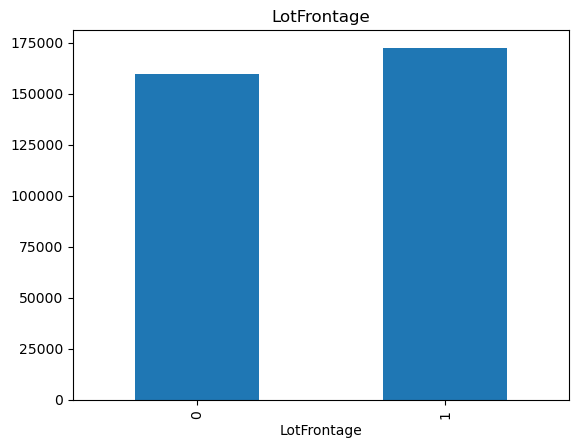

<IPython.core.display.Javascript object>

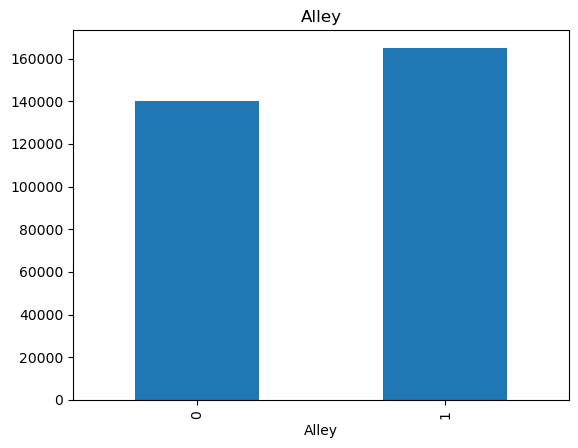

<IPython.core.display.Javascript object>

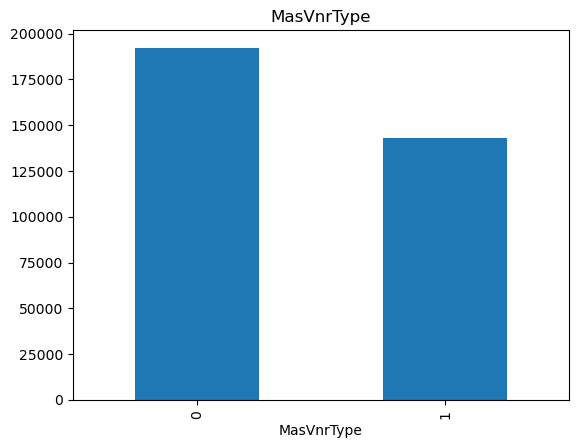

<IPython.core.display.Javascript object>

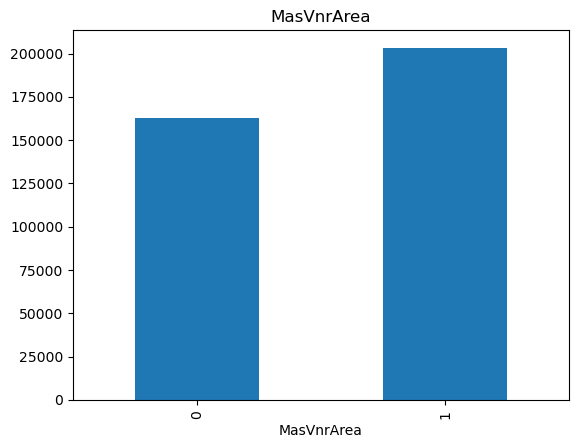

<IPython.core.display.Javascript object>

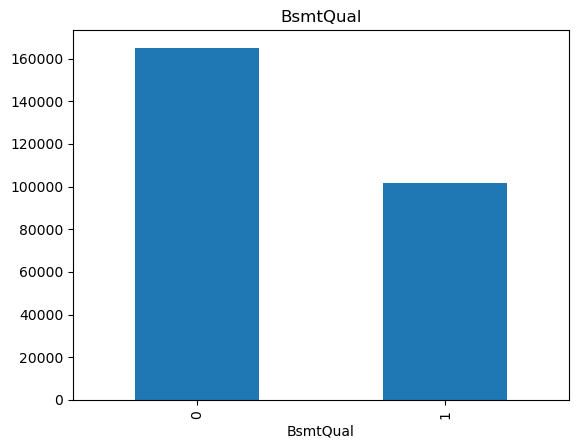

<IPython.core.display.Javascript object>

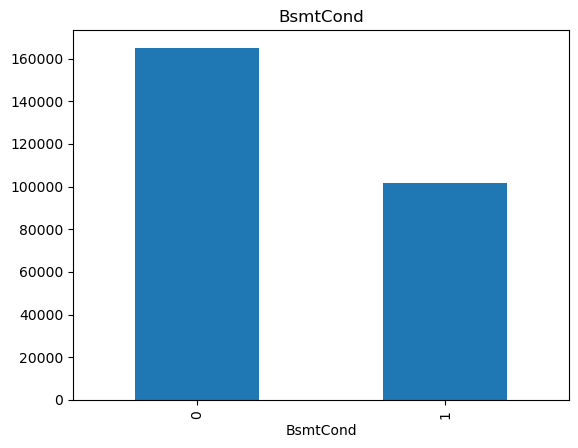

<IPython.core.display.Javascript object>

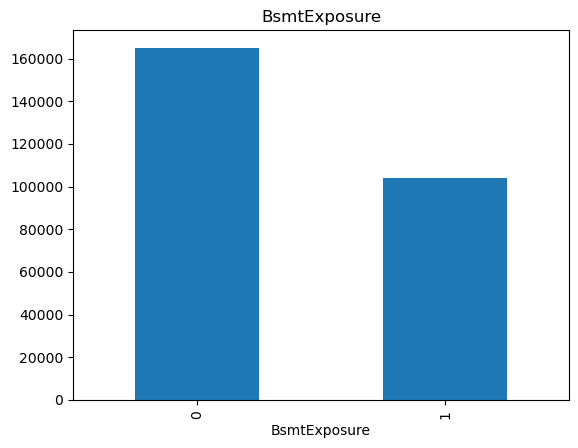

<IPython.core.display.Javascript object>

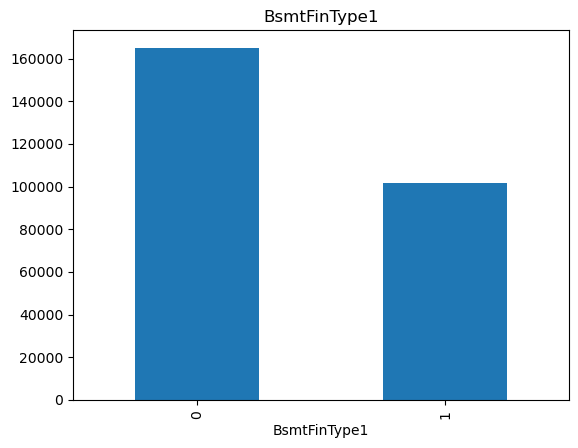

<IPython.core.display.Javascript object>

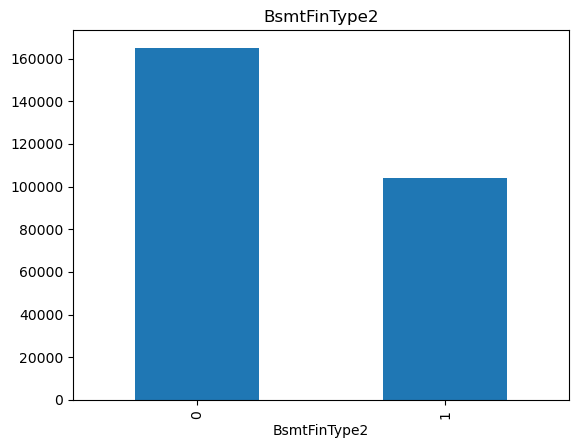

<IPython.core.display.Javascript object>

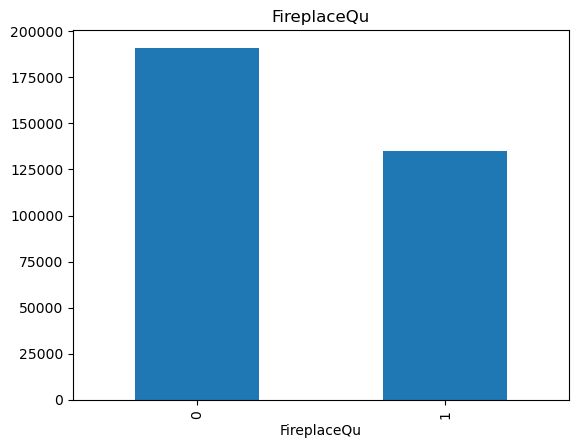

<IPython.core.display.Javascript object>

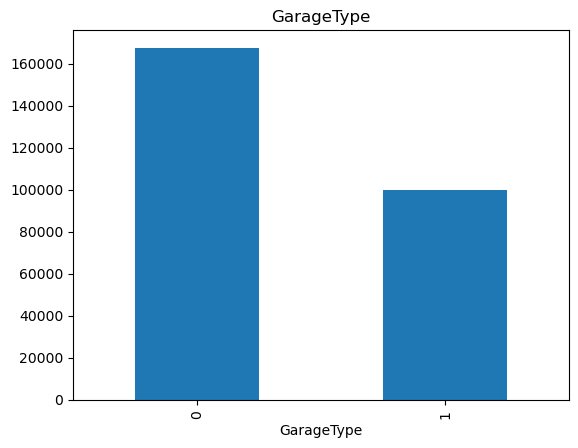

<IPython.core.display.Javascript object>

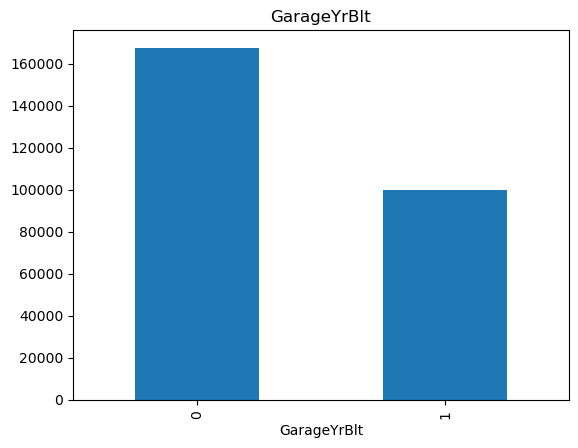

<IPython.core.display.Javascript object>

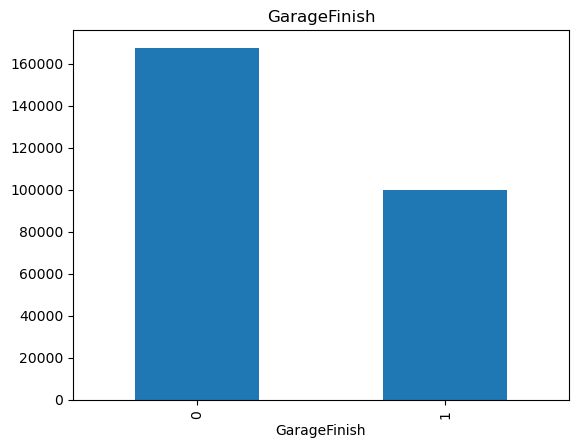

<IPython.core.display.Javascript object>

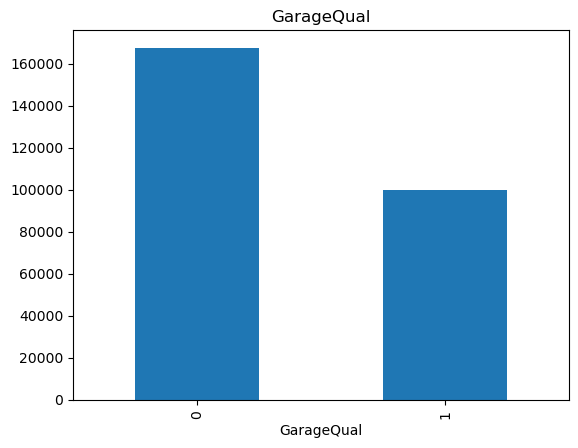

<IPython.core.display.Javascript object>

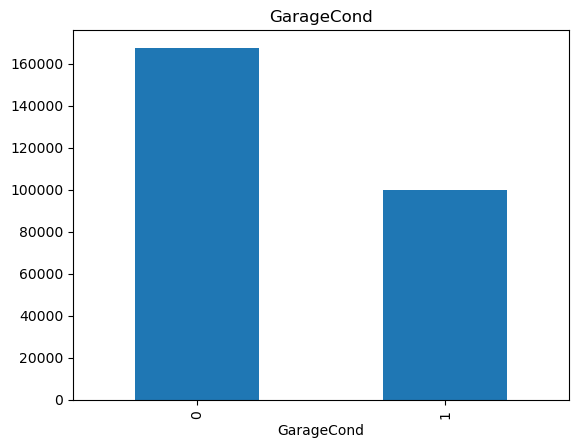

<IPython.core.display.Javascript object>

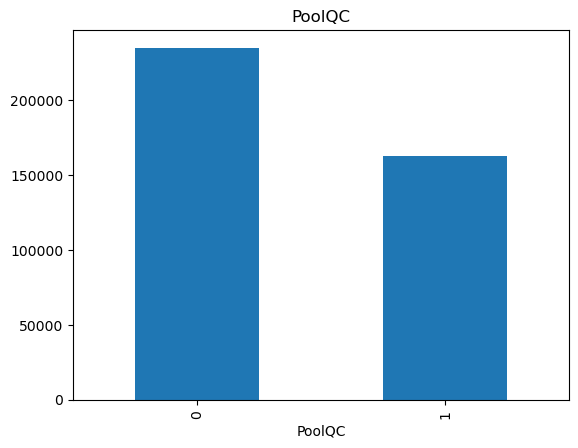

<IPython.core.display.Javascript object>

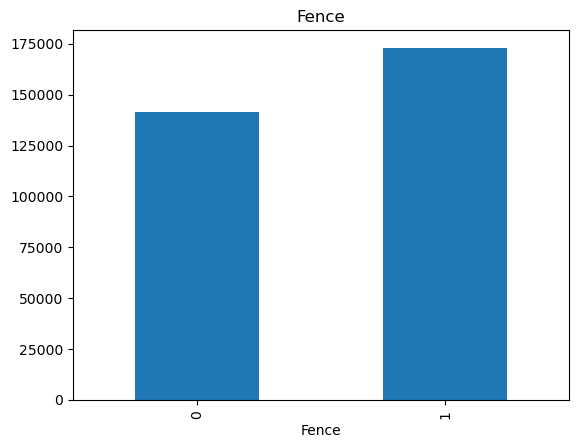

<IPython.core.display.Javascript object>

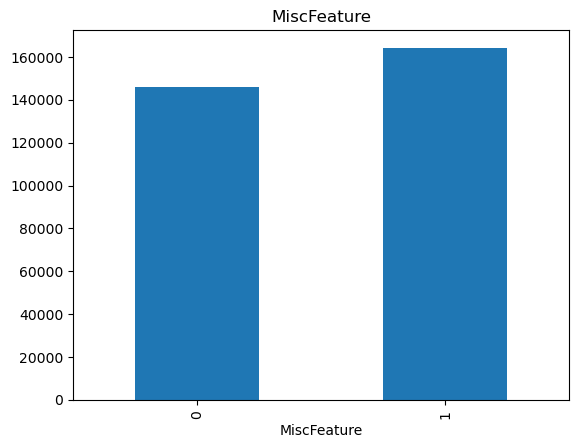

In [5]:
data = dataset.copy()
for feature in features_with_na:
    
    # Let's make a variable that indicates 1 if the observation was missing or 
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Let's calculate the mea SalesPrice where the information is missing or pre
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here with the relationship between the missing values and the dependent variable is clearly visible. So we need to replace these nan values with something meaningful which will be done in during feature engineering section,

From the above dataset some of the features lid Id is not required.

In [6]:
print('Id of Houses: {}'.format(len(dataset.Id)))

Id of Houses: 1460


## Numerical Variables

In [7]:
# List of numerical Variables
numerical_features = [features for features in dataset.columns if dataset[features].dtypes != 'O'] # 'O' refers to object which is string

print('Number of numerical variables: ', len(numerical_features))

# Visualize the numerical varaibles
dataset[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Temporal Variables (Eg. Datetime Variables)

From the dataset we have 4 year variables. We have to extract information from the datetime variables like number of years or number of days. One example in this specific scenario can be the difference in years between the year the house was built and the year the house was sold. We will be performing this anaysis in the Feature Engineering sectiom.

In [8]:
# List of varaibles that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
# Let's explore the content of these year variables

for feature in year_feature:
    print(feature, dataset[feature].unique())
    print('\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]


YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

Text(0.5, 1.0, 'House Price vs YearSold')

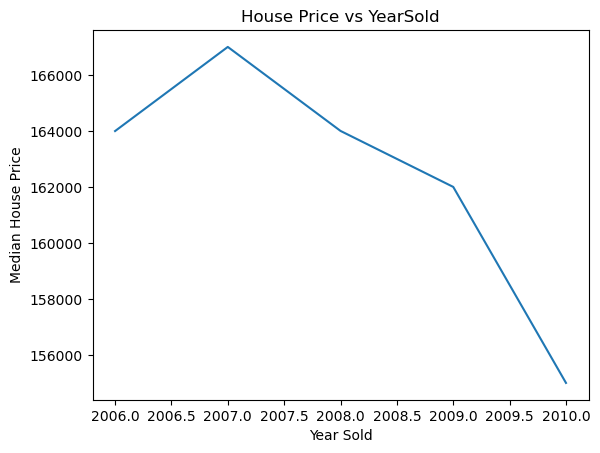

In [10]:
# Let's Analyze the Temporal Datetime Variable
# we will check weather ther is a relation between year

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")
plt.title("House Price vs YearSold")

In [11]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

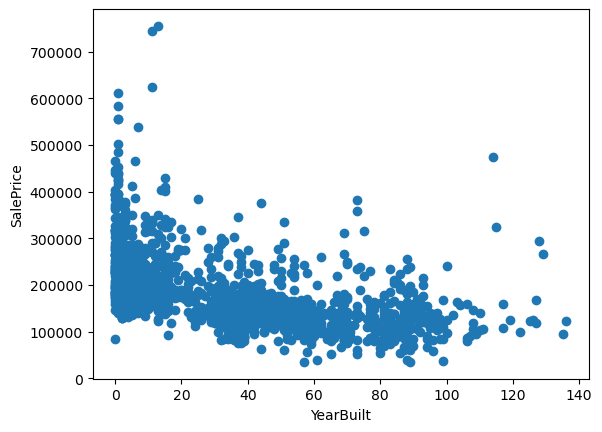

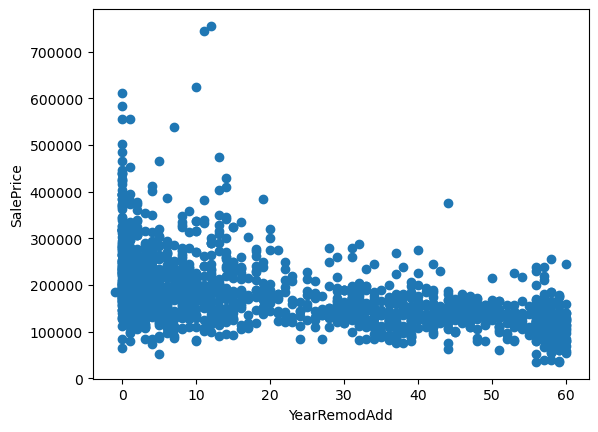

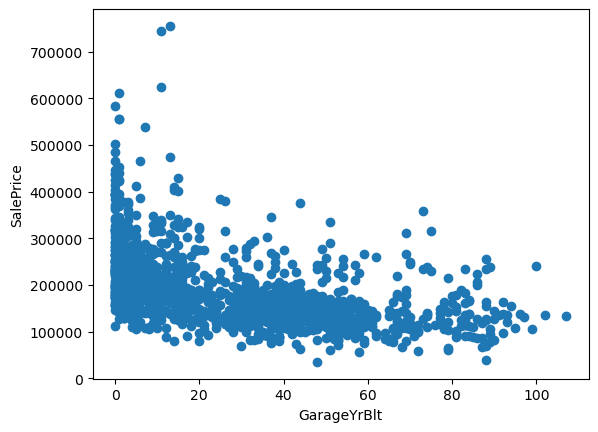

In [12]:
## Here we will compare the different between all the years feature with Sales Price

for feature in year_feature:
    if feature != 'YrSold':
        data = dataset.copy()
        
        ## we will capture the difference between year variable and year the house sold
        data[feature] = data["YrSold"] - data[feature] # this gives us the difference in the years between year of the feature and when is was sold
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

In [13]:
# Numerical varaiables are usally of 2 types
# 1. Continuous Variables and Discrete Variables

discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature + ['Id']] # the + concatinates the year features and 'Id' into one list
print('Discrete Variables Count: {}'.format(len(discrete_features)))

Discrete Variables Count: 17


In [14]:
dataset[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


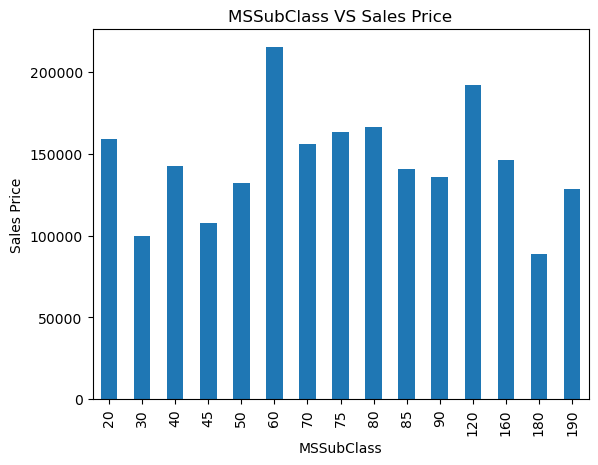

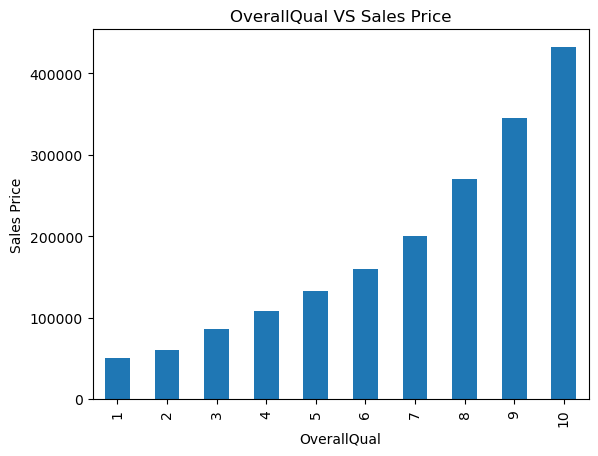

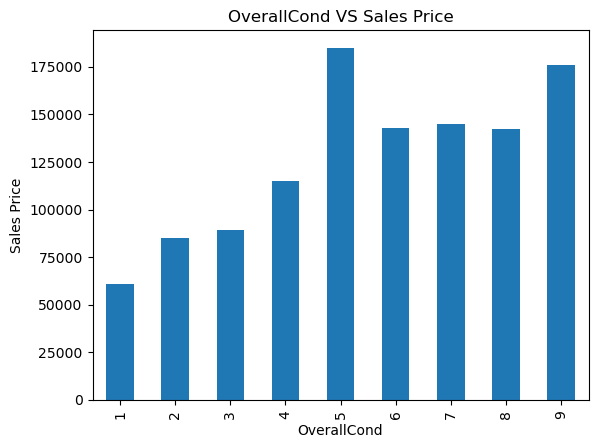

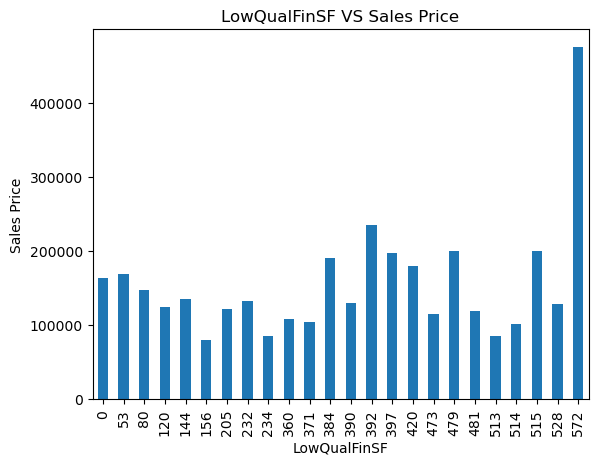

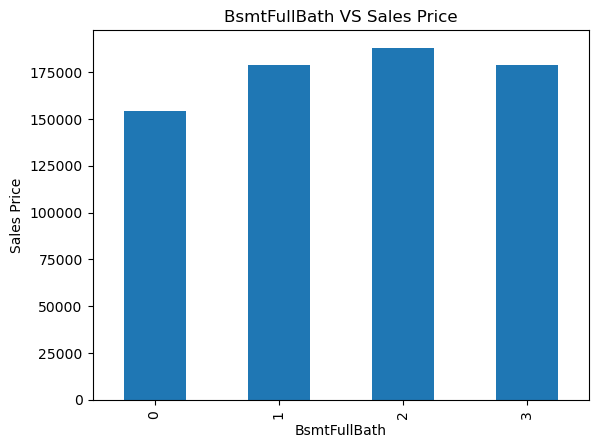

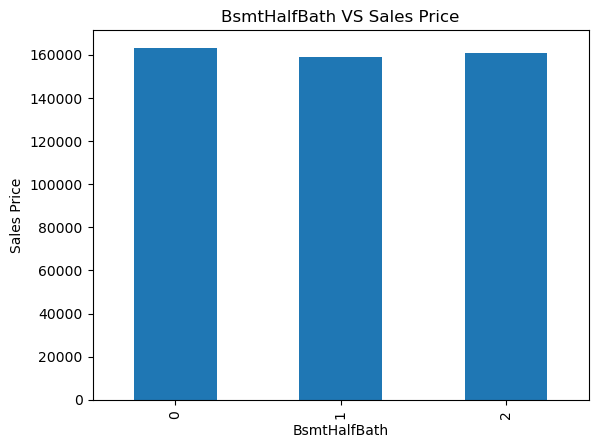

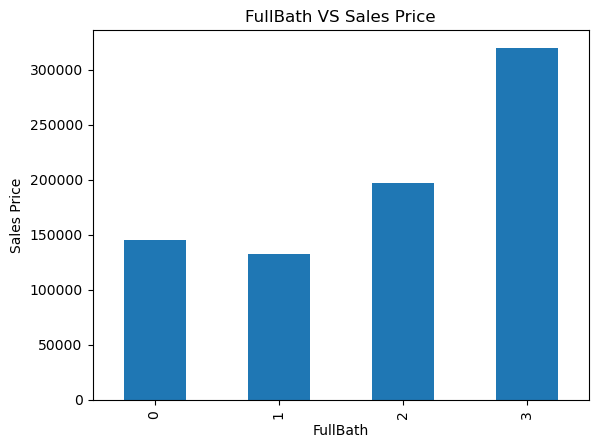

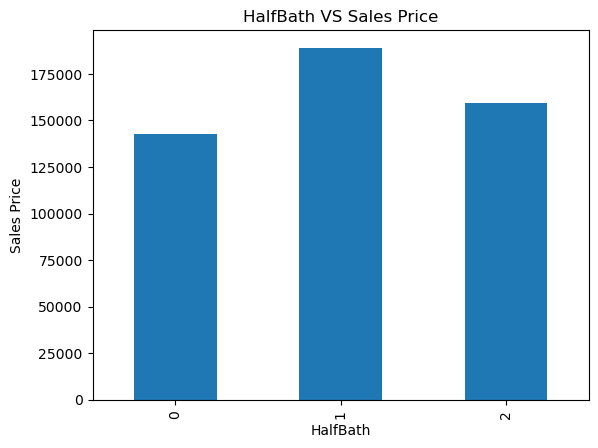

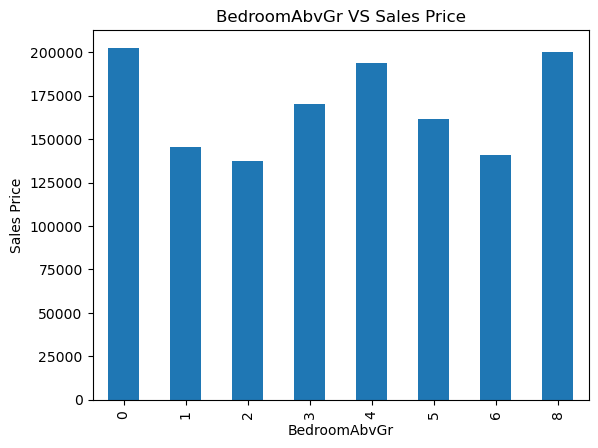

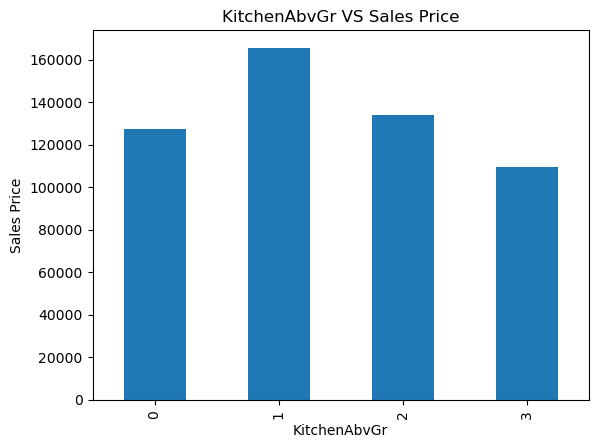

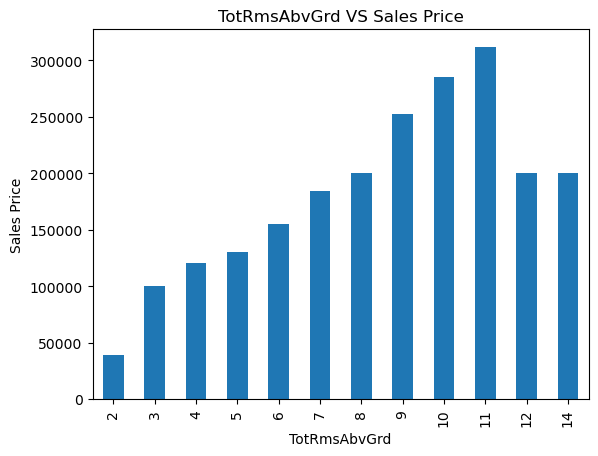

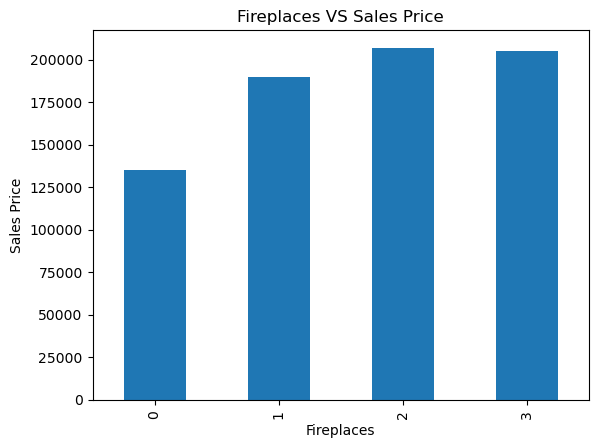

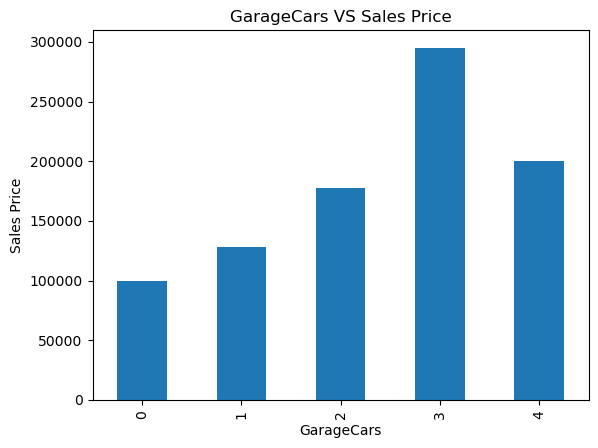

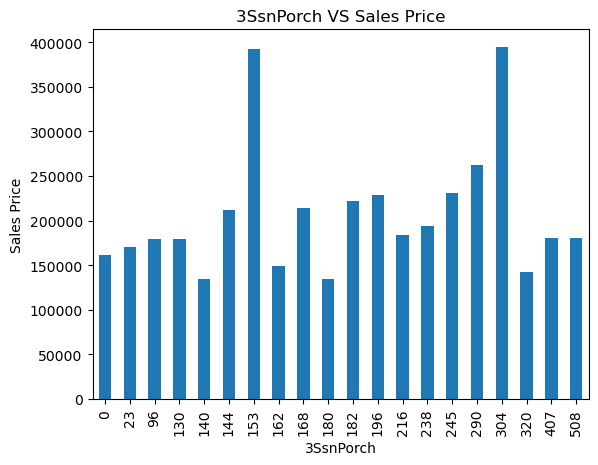

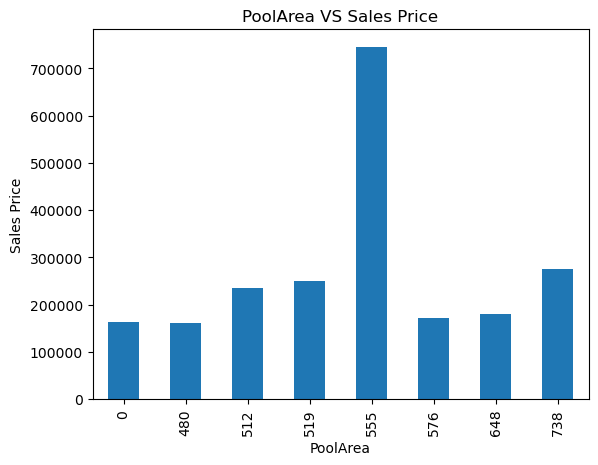

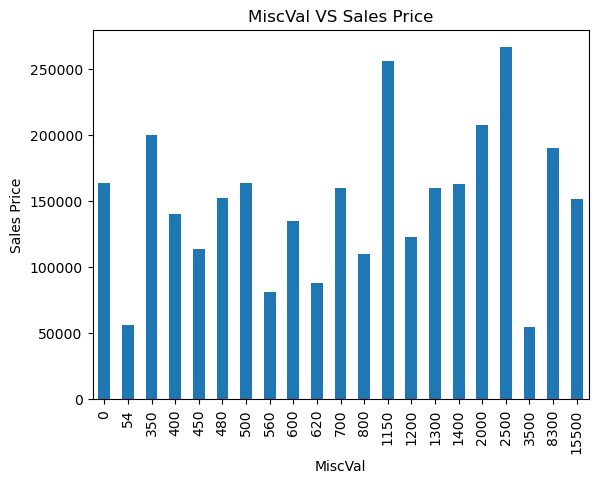

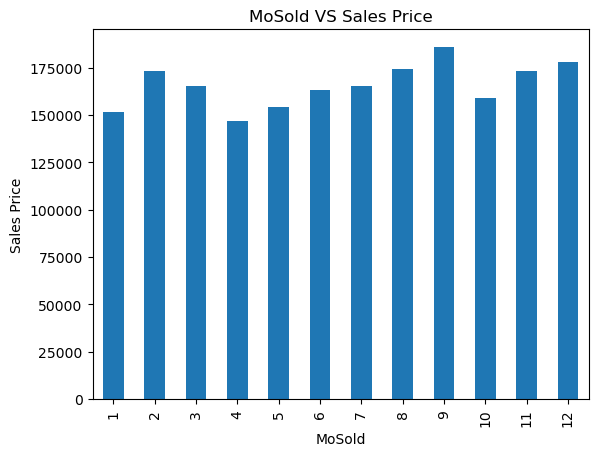

In [15]:
## Lets find the relationship between them and sales price

for feature in discrete_features:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title('{} VS Sales Price'.format(feature))
    plt.show()

There are relationships between Sales Price and the features

### Continuous Variables

In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+year_feature + ['Id']]
print('Continuous Features: {}'.format(len(continuous_features)))

Continuous Features: 16


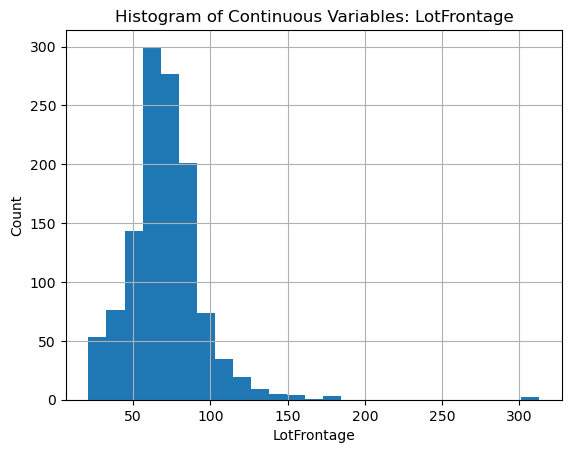

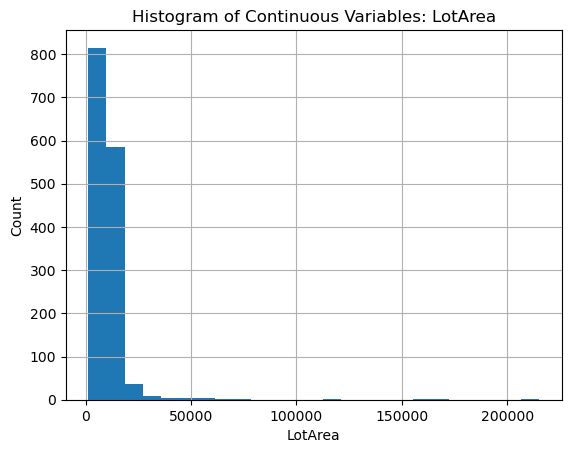

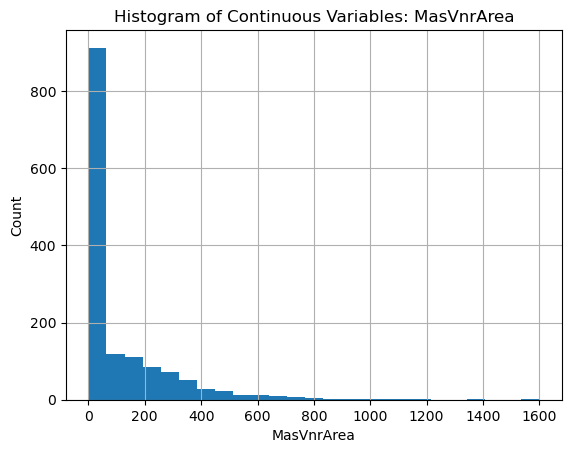

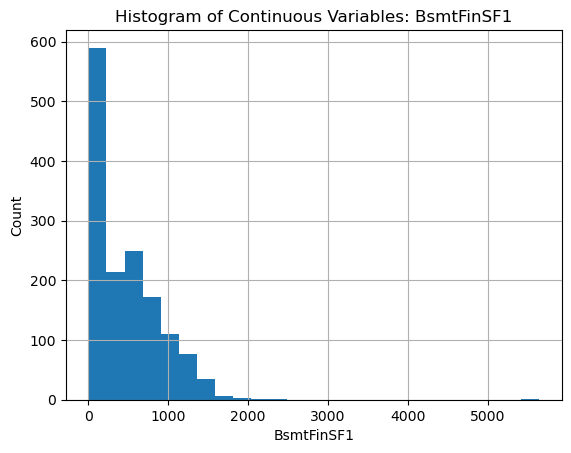

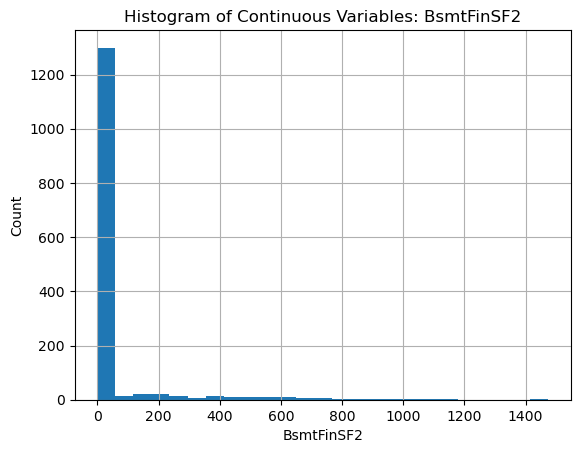

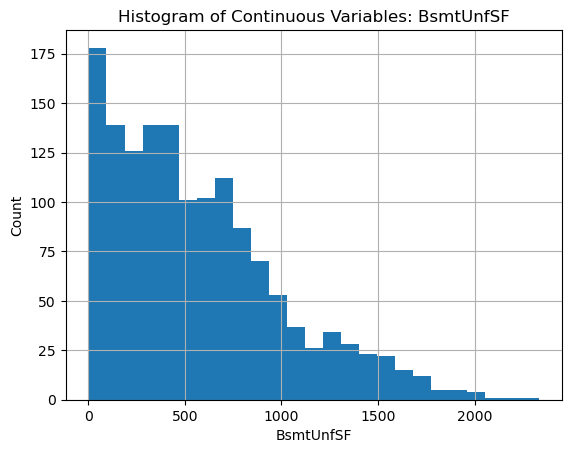

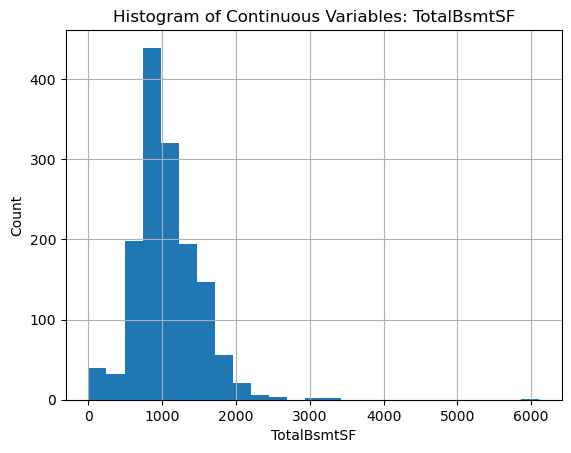

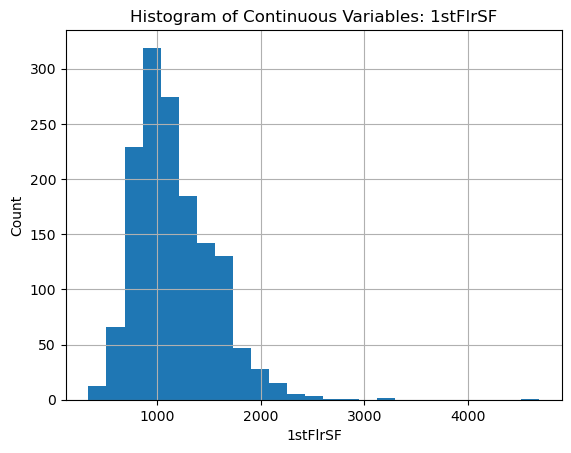

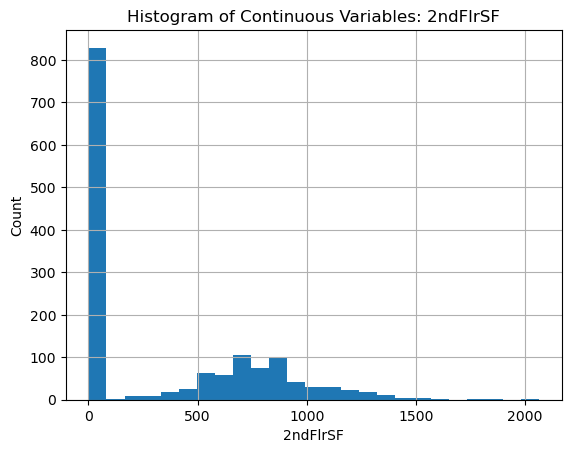

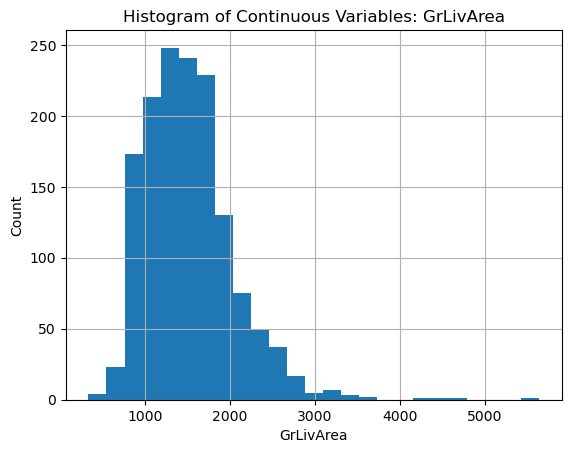

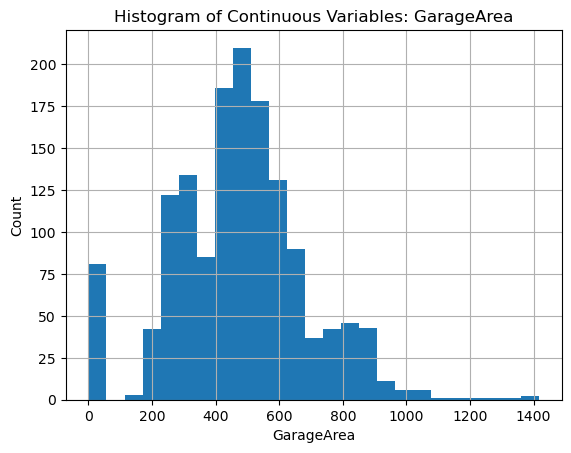

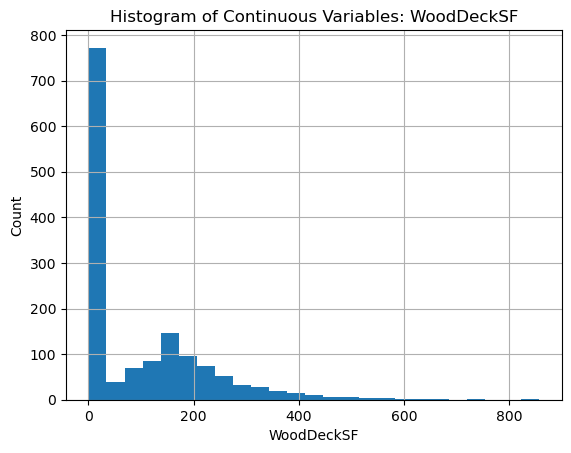

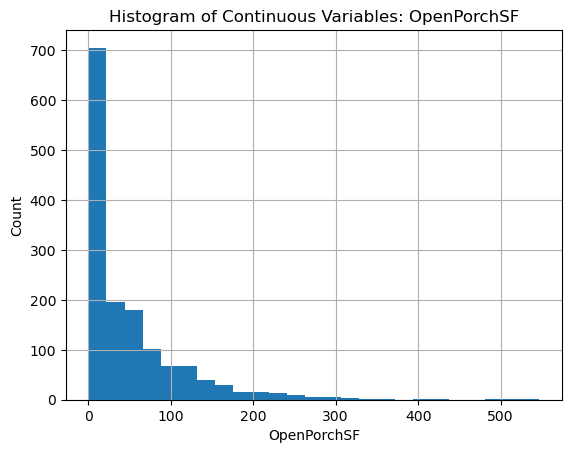

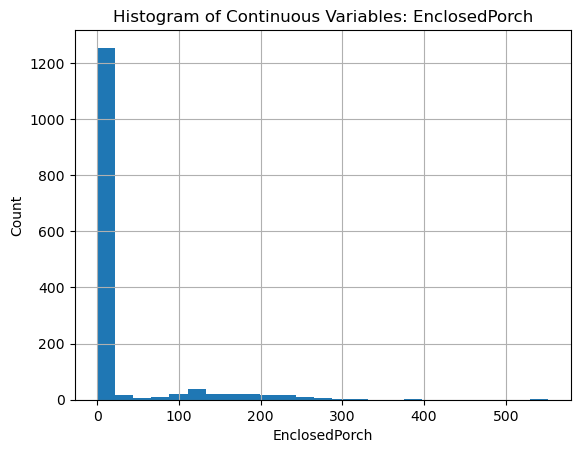

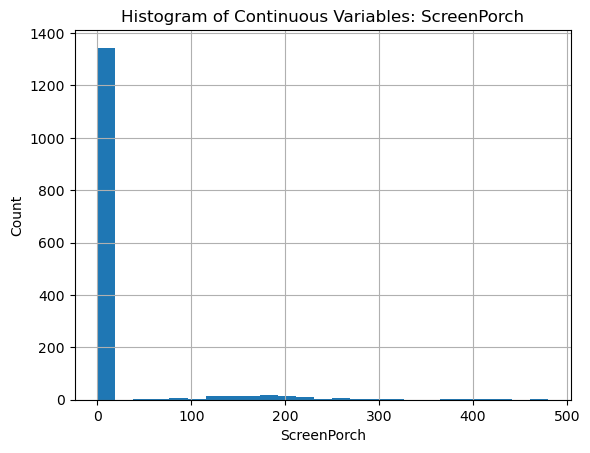

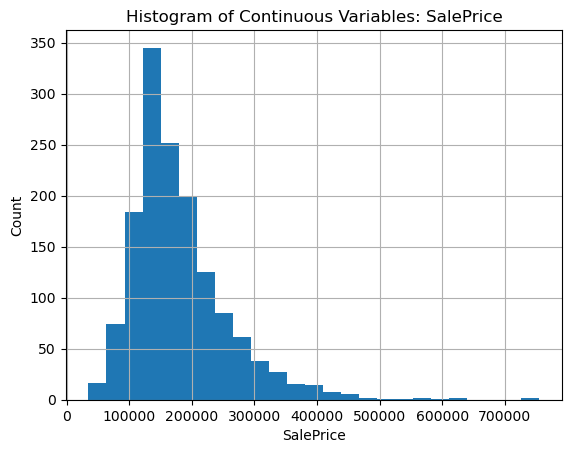

In [17]:
## Lets analyze the continuous values by creating hisograms to understand the distribution

for feature in continuous_features:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("Histogram of Continuous Variables: {}".format(feature))
    plt.show()

## Expanatory Data Analysis Part 2

We will be usung logarthimic transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

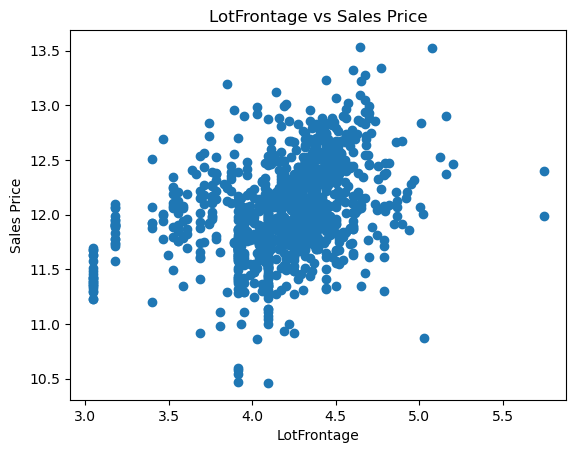

<IPython.core.display.Javascript object>

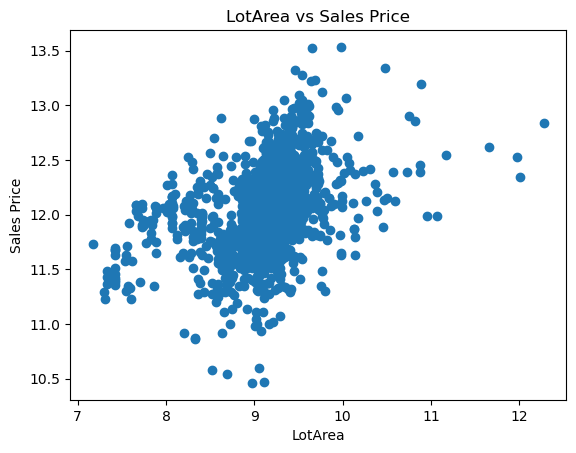

<IPython.core.display.Javascript object>

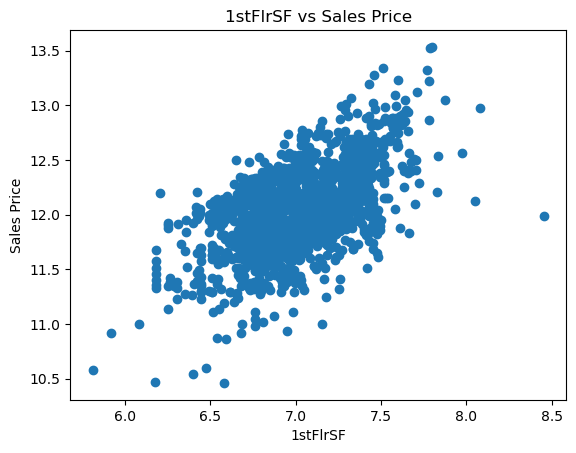

<IPython.core.display.Javascript object>

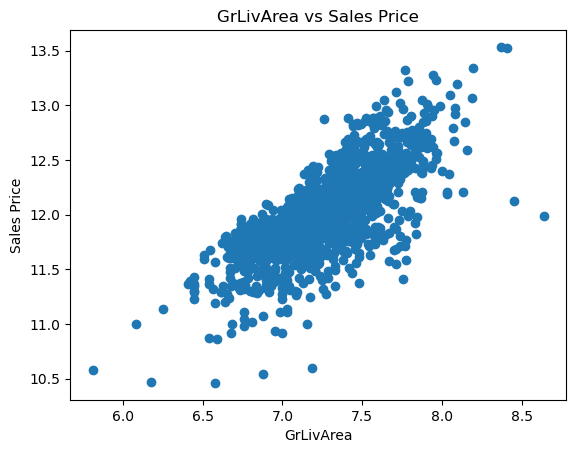

In [30]:
data = dataset.copy()
data['SalePrice'] = np.log(data['SalePrice'])
for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    elif feature == 'SalePrice':
        pass
    else:
        data[feature] = np.log(data[feature])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.title('{} vs Sales Price'.format(feature))
        plt.show()

## Outilers